In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_path = '../0.datasets/DailyDelhiClimateTrain.csv'
test_path = '../0.datasets/DailyDelhiClimateTest.csv'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print(train_df.info())
print(train_df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None
          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


In [52]:
train_df = train_df.interpolate()

print(train_df.isnull().sum())


date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64


/tmp/ipykernel_202741/2880183595.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  train_df = train_df.interpolate()


In [53]:
train_df['date'] = pd.to_datetime(train_df['date']) 
test_df['date'] = pd.to_datetime(test_df['date']) 

train_df.set_index('date', inplace=True)
test_df.set_index('date', inplace=True)

print(train_df.head())

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000


<function matplotlib.pyplot.show(close=None, block=None)>

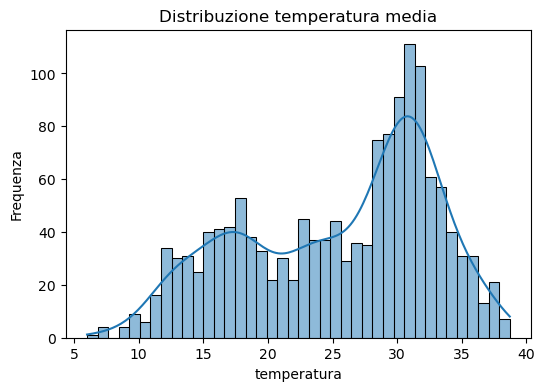

In [54]:
plt.figure(figsize=(6, 4))
sns.histplot(train_df['meantemp'], kde=True, bins=40)
plt.title('Distribuzione temperatura media')
plt.xlabel('temperatura')
plt.ylabel('Frequenza')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

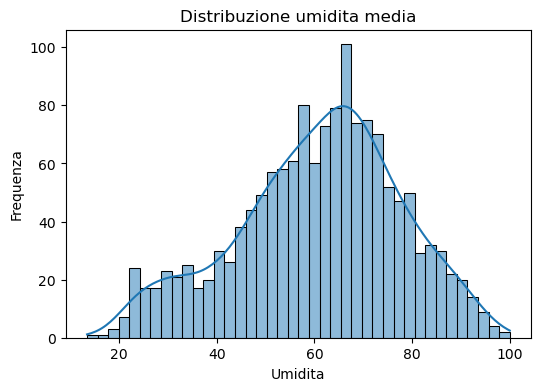

In [55]:
plt.figure(figsize=(6, 4))
sns.histplot(train_df['humidity'], kde=True, bins=40)
plt.title('Distribuzione umidita media')
plt.xlabel('Umidita')
plt.ylabel('Frequenza')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

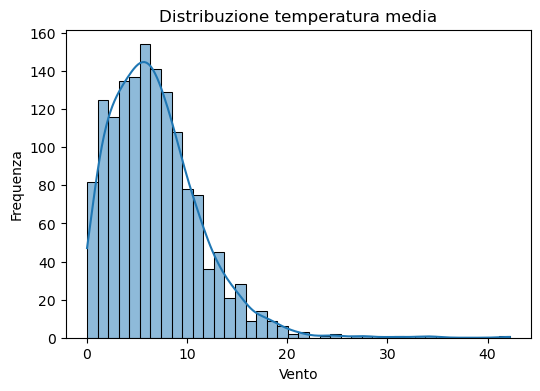

In [56]:
plt.figure(figsize=(6, 4))
sns.histplot(train_df['wind_speed'], kde=True, bins=40)
plt.title('Distribuzione temperatura media')
plt.xlabel('Vento')
plt.ylabel('Frequenza')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

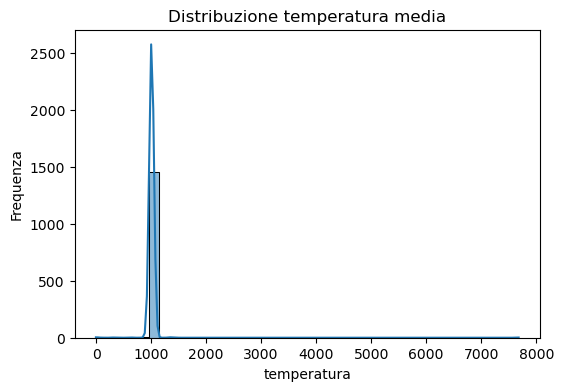

In [57]:
plt.figure(figsize=(6, 4))
sns.histplot(train_df['meanpressure'], kde=True, bins=40)
plt.title('Distribuzione temperatura media')
plt.xlabel('temperatura')
plt.ylabel('Frequenza')
plt.show

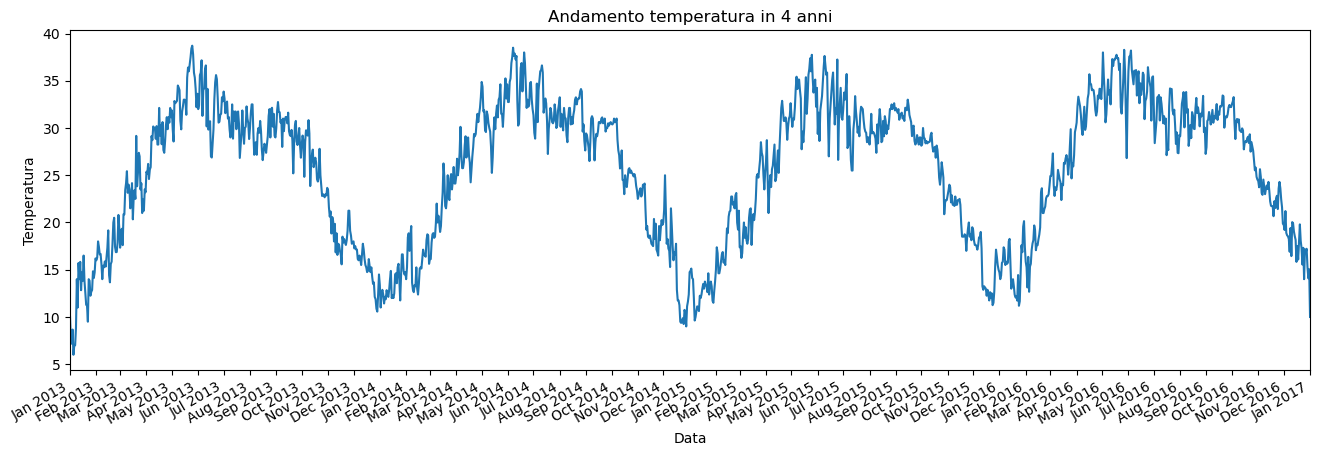

In [58]:
import matplotlib.dates as mdates

plt.figure(figsize=(16, 5))
train_df['meantemp'].plot()
plt.title("Andamento temperatura in 4 anni")
plt.ylabel('Temperatura')
plt.xlabel('Data')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.gcf().autofmt_xdate()

plt.show()



In [59]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

reg = linear_model.LinearRegression()

X_train = train_df[['humidity', 'wind_speed', 'meanpressure']]
y_train = train_df['meantemp']

reg.fit(X_train, y_train)

X_test = test_df[['humidity', 'wind_speed', 'meanpressure']]
y_test = test_df['meantemp']

y_pred = reg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(rmse)
print(mae)





37.84033447787636
5.27449100924316


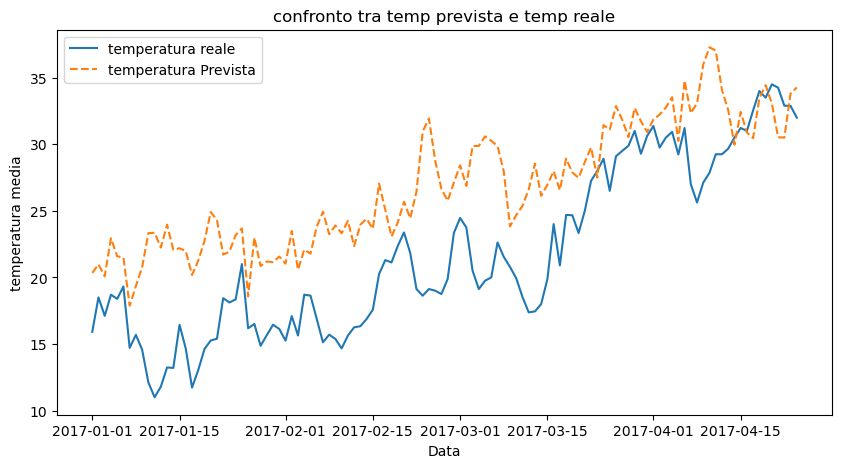

In [60]:
plt.figure(figsize=(10, 5))
plt.plot(test_df.index, y_test, label='temperatura reale')
plt.plot(test_df.index, y_pred, label='temperatura Prevista', linestyle='--')
plt.title("confronto tra temp prevista e temp reale")
plt.xlabel("Data")
plt.ylabel('temperatura media')
plt.legend()
plt.show()



In [61]:
# print(train_df.head())
# print(test_df.head())

print(train_df.describe())
print(test_df.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333
         meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750   1016.739583
max     34.500000   9

In [62]:
train_df_cleaned = train_df[(train_df['meanpressure'] > 900) & (train_df['meanpressure'] < 1100)]
test_df_cleaned = test_df[(test_df['meanpressure'] > 900) & (test_df['meanpressure'] < 1100)]

In [63]:
X_train = train_df_cleaned[['humidity', 'wind_speed', 'meanpressure']]
y_train = train_df_cleaned['meantemp']

reg.fit(X_train, y_train)

X_test = test_df_cleaned[['humidity', 'wind_speed', 'meanpressure']]
y_test = test_df_cleaned['meantemp']

y_pred = reg.predict(X_test)

rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(rmse)
print(mae)

8.594649864739665
2.3137182155196196


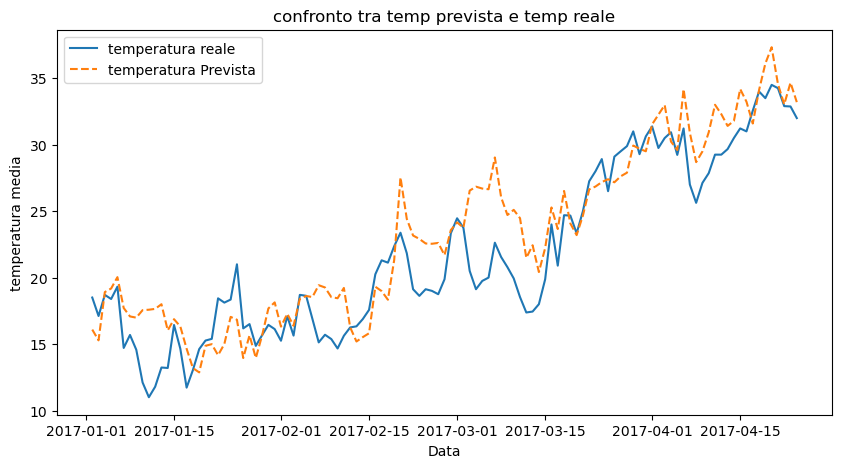

In [64]:
plt.figure(figsize=(10, 5))
plt.plot(test_df_cleaned.index, y_test, label='temperatura reale')
plt.plot(test_df_cleaned.index, y_pred, label='temperatura Prevista', linestyle='--')
plt.title("confronto tra temp prevista e temp reale")
plt.xlabel("Data")
plt.ylabel('temperatura media')
plt.legend()
plt.show()

In [65]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_RF = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_RF)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_RF)

print(mse_rf, rmse_rf, mae_rf)



10.894227473701276 3.3006404641677163 2.576121577404136


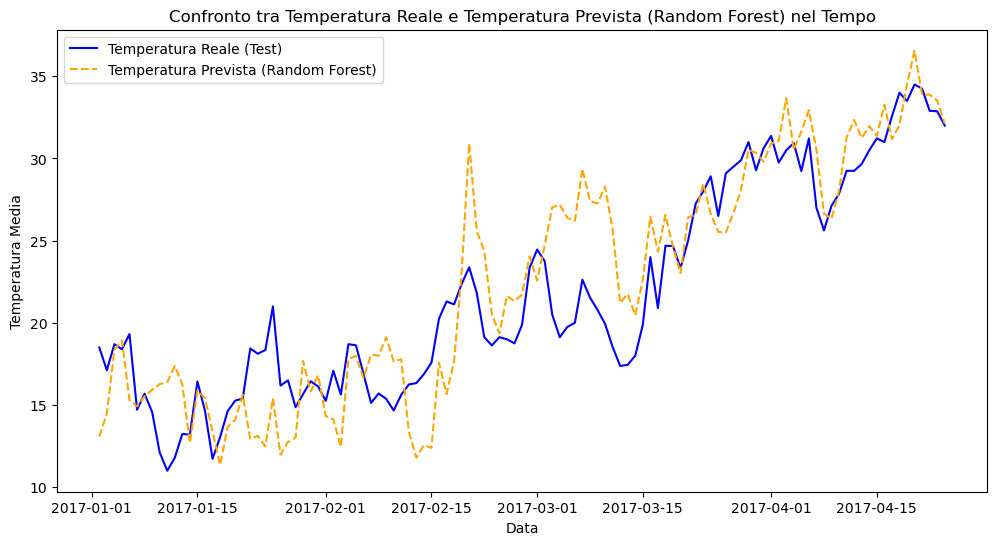

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(test_df_cleaned.index, y_test, label='Temperatura Reale (Test)', color='blue')
plt.plot(test_df_cleaned.index, y_pred_RF, label='Temperatura Prevista (Random Forest)', color='orange', linestyle='--')

# Impostazioni del grafico
plt.title("Confronto tra Temperatura Reale e Temperatura Prevista (Random Forest) nel Tempo")
plt.xlabel("Data")
plt.ylabel("Temperatura Media")
plt.legend()
plt.show()